# Signal Processing Project

## Introduction

### Problem

Despite  they  may  not  look  like,  fruit  markets  are  very  competitive. Nowadays, the  authenticity  of Plátano de Canarias, a banana variety that hasa higher price due to its Protected Designation of Origin (PDO), is a significant concern. Fraudulent labelling of cheaper bananas coming from other countries occurs,  undermining market  integrity  and  consumer  trust. To  combat  this, optimized analytical methods are employed to distinguish genuine Plátano de Canarias from other bananas. In this regards, Liquid  Chromatography is  a common analytical  technique  used  for  this  purpose.  It  allows  for  the separation, identification, and quantification of the unique chemical compounds present in the food. 

For this project, samples from various bananas have been analysedto identify markers indicative of their true origin. Four different parts have been analysed: pulp, peel, flower tip, and neck. The focus will  be  on analysing the  chromatography  data  to  detect  the  presence  of  specific  compounds  or markers that are characteristic of the Plátano de Canarias. The process involves also examining how sample preparation techniques, suchas concentrating the extracts of the pulp, peel, flower tip, and neck, affect the detection of these markers. This evaluation will help in understanding how to enhance the sensitivity of the tests, ensuring the accurate identification of the Plátano de Canarias.

In  this  exercise  you  need  to  do what  the analytical  chemistry team  at the Food  Safety  Authority of Ireland(FSAI) do,by examining samples from 10 bananas (labelled 1 to 10). In some of these bananas which arrived at the Dublin port, there is a suspicion of fraudulent labelling. Your goal is to analyse the provided samples to determine if any of the bananas have been labelled wrong in purpose to obtain more benefit.

### Outline

We will start by loading the data and visualizing it. Then, we will perform some preprocessing steps to clean the data. After that, we will try to separate the samples using clustering techniques.

## Data processing

### Description

The data is separated into two categories: treated and untreated samples. We also have a series of 10 bananas that were used as a control group. The data is stored in a txt file (separated with tabulations) with two float columns: time and intensity. We will later ignore the time column, as it is not relevant for our analysis (replaced by a default index).

We need for every dataframe to convert the content to float, as it is stored as a string and in an particular notation (e.g. 1,000.000).

Note that we also removed the time column, as it is not relevant for our analysis but stick to a default index.

### Imports

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Data exploration

To understand the shape of the data we are going to analyze, we are going to plot the data for two random bananas.

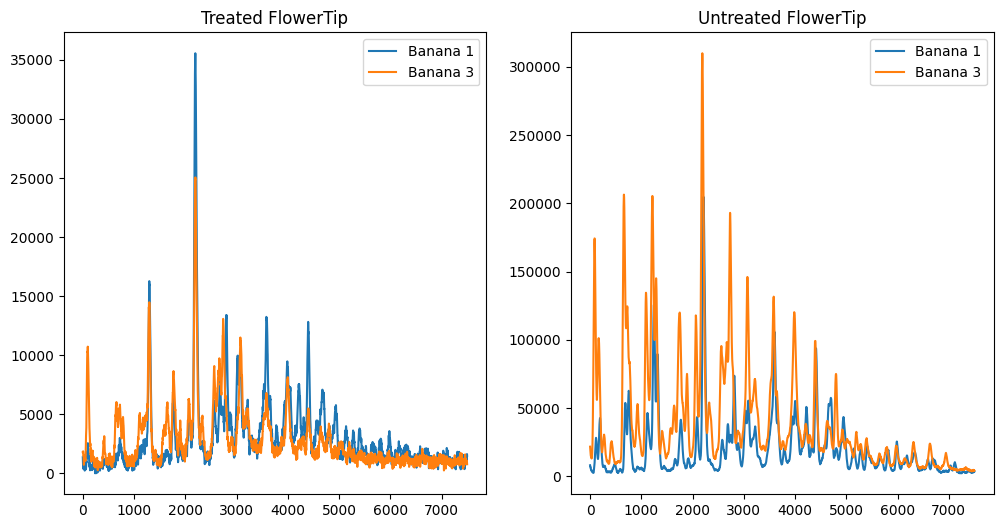

In [216]:
banana1_flowertip_treated_1 = pd.read_csv("../data/Treated_samples/1-FlowerTip-1.txt", sep="\t").replace(',', '', regex=True).astype(float)
banana3_flowertip_treated_1 = pd.read_csv("../data/Treated_samples/3-FlowerTip-1.txt", sep="\t").replace(',', '', regex=True).astype(float)
banana1_flowertip_untreated = pd.read_csv("../data/Untreated_samples/1-FlowerTip.txt", sep="\t").replace(',', '', regex=True).astype(float)
banana3_flowertip_untreated = pd.read_csv("../data/Untreated_samples/3-FlowerTip.txt", sep="\t").replace(',', '', regex=True).astype(float)



plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(banana1_flowertip_treated_1.iloc[:,1], label='Banana 1')
plt.plot(banana3_flowertip_treated_1.iloc[:,1], label='Banana 3')
plt.title('Treated FlowerTip')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(banana1_flowertip_untreated.iloc[:,1], label='Banana 1')
plt.plot(banana3_flowertip_untreated.iloc[:,1], label='Banana 3')
plt.title('Untreated FlowerTip')
plt.legend()

plt.show()

Then we normalize it to have a better understanding of the data.

In [217]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

banana1_flowertip_treated_1_normalized = scaler.fit_transform(banana1_flowertip_treated_1)
banana3_flowertip_treated_1_normalized = scaler.fit_transform(banana3_flowertip_treated_1)
banana1_flowertip_untreated_normalized = scaler.fit_transform(banana1_flowertip_untreated)
banana3_flowertip_untreated_normalized = scaler.fit_transform(banana3_flowertip_untreated)

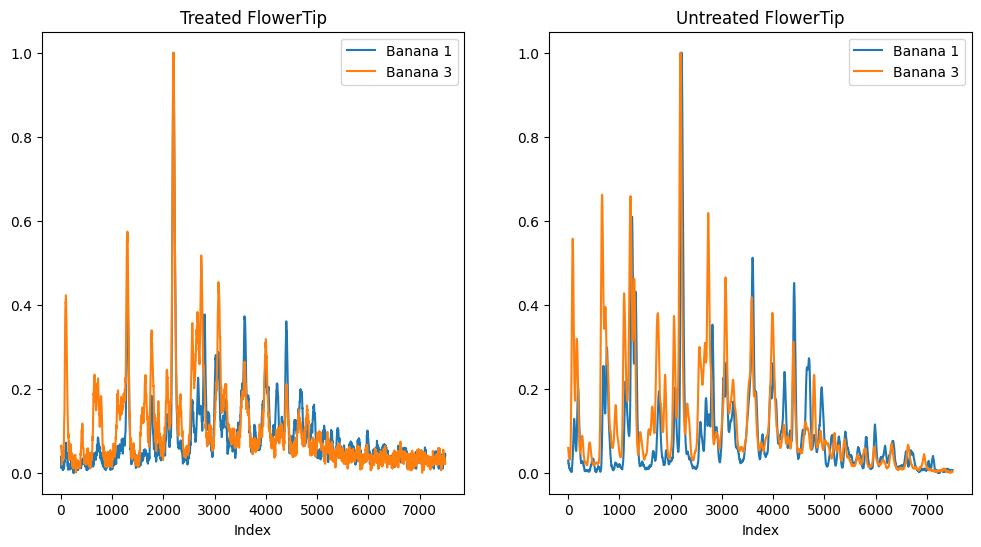

In [218]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(banana1_flowertip_treated_1_normalized[:,1], label='Banana 1')
plt.plot(banana3_flowertip_treated_1_normalized[:,1], label='Banana 3')
plt.title('Treated FlowerTip')
plt.xlabel('Index')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(banana1_flowertip_untreated_normalized[:,1], label='Banana 1')
plt.plot(banana3_flowertip_untreated_normalized[:,1], label='Banana 3')
plt.title('Untreated FlowerTip')
plt.xlabel('Index')
plt.legend()

plt.show()


This way, the data is going to be more understandable and we can see the differences between the samples. The peaks are going to be more visible.

We will keep the time column until the normalization, after what we will dump it as it is not relevant for our analysis.

In [219]:
def load_data(path):
    dataframe = pd.read_csv(path, sep="\t", header=None)
    dataframe = dataframe.replace(',', '', regex=True).astype(float)
    return dataframe

In [220]:
def normalize_data(dataframe):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    normalized_dataframe = normalized_dataframe.iloc[:,1]
    return normalized_dataframe

In [221]:
def get_values_column(dataframe):
    return dataframe.iloc[:,1]

In [222]:
def get_last_column(dataframe):
    return dataframe.iloc[:,-1]

In [223]:
def average_signals(dataframe1, dataframe2, dataframe3):
    combined = pd.concat([dataframe1, dataframe2, dataframe3], axis=1)
    combined['mean'] = combined.mean(axis=1)
    combined = combined['mean']
    return combined

In [224]:
def combine_signals(dataframes):
    combined = pd.concat([dataframe for dataframe in dataframes], axis=1)
    return combined

In [225]:
def plot_4_signals(dataframe1, dataframe2, dataframe3, dataframe4, title1, title2, title3, title4, g_title):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(g_title, fontsize=20)
    axs[0, 0].plot(dataframe1)
    axs[0, 0].set_title(title1)
    axs[0, 0].set_xlabel('Index')

    axs[0, 1].plot(dataframe2)
    axs[0, 1].set_title(title2)
    axs[0, 1].set_xlabel('Index')

    axs[1, 0].plot(dataframe3)
    axs[1, 0].set_title(title3)
    axs[1, 0].set_xlabel('Index')

    axs[1, 1].plot(dataframe4)
    axs[1, 1].set_title(title4)
    axs[1, 1].set_xlabel('Index')

    plt.show()

#### Banana 1

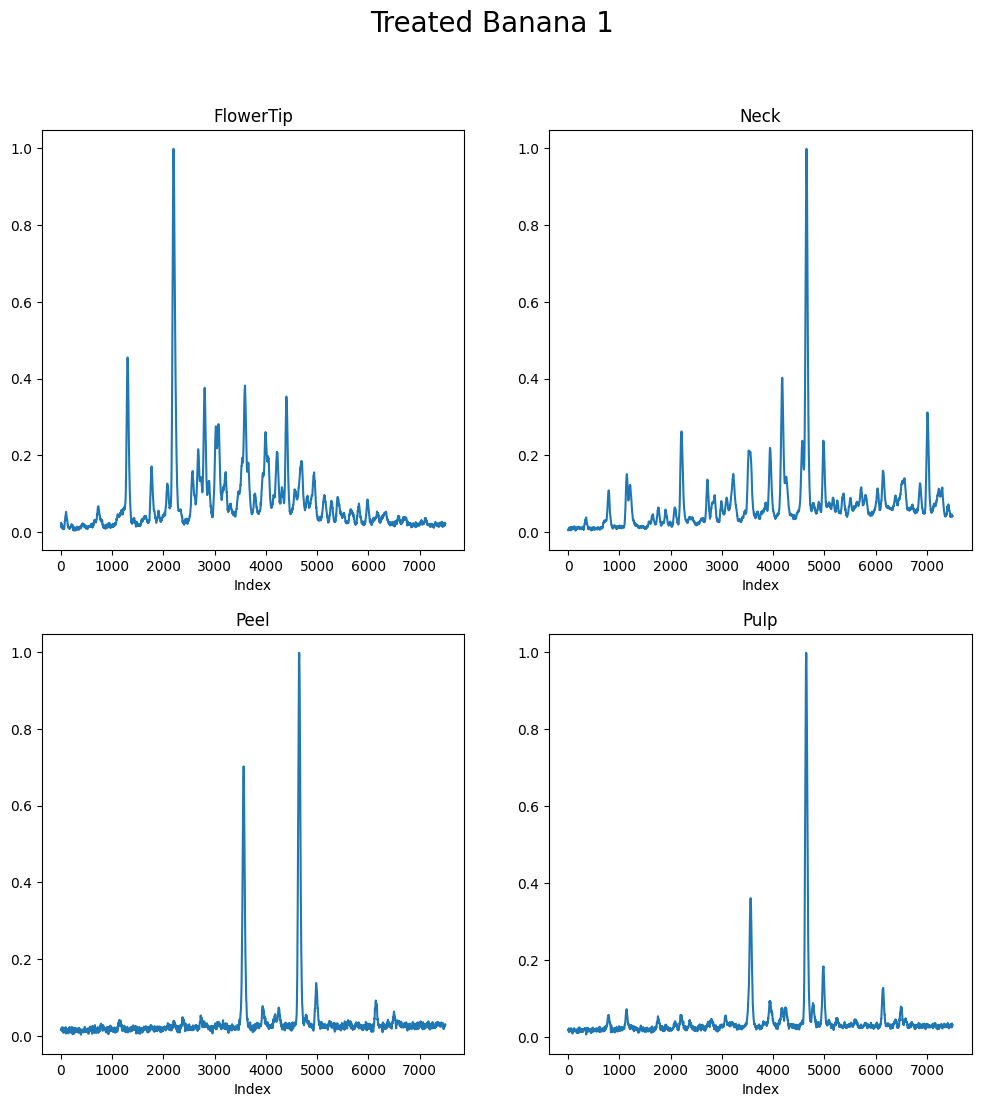

In [226]:
banana1_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-FlowerTip-3.txt")))

banana1_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-Neck-3.txt")))

banana1_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-Peel-3.txt")))

banana1_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/1-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/1-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/1-Pulp-3.txt")))

plot_4_signals(banana1_flowertip_treated, banana1_neck_treated, banana1_peel_treated, banana1_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 1')

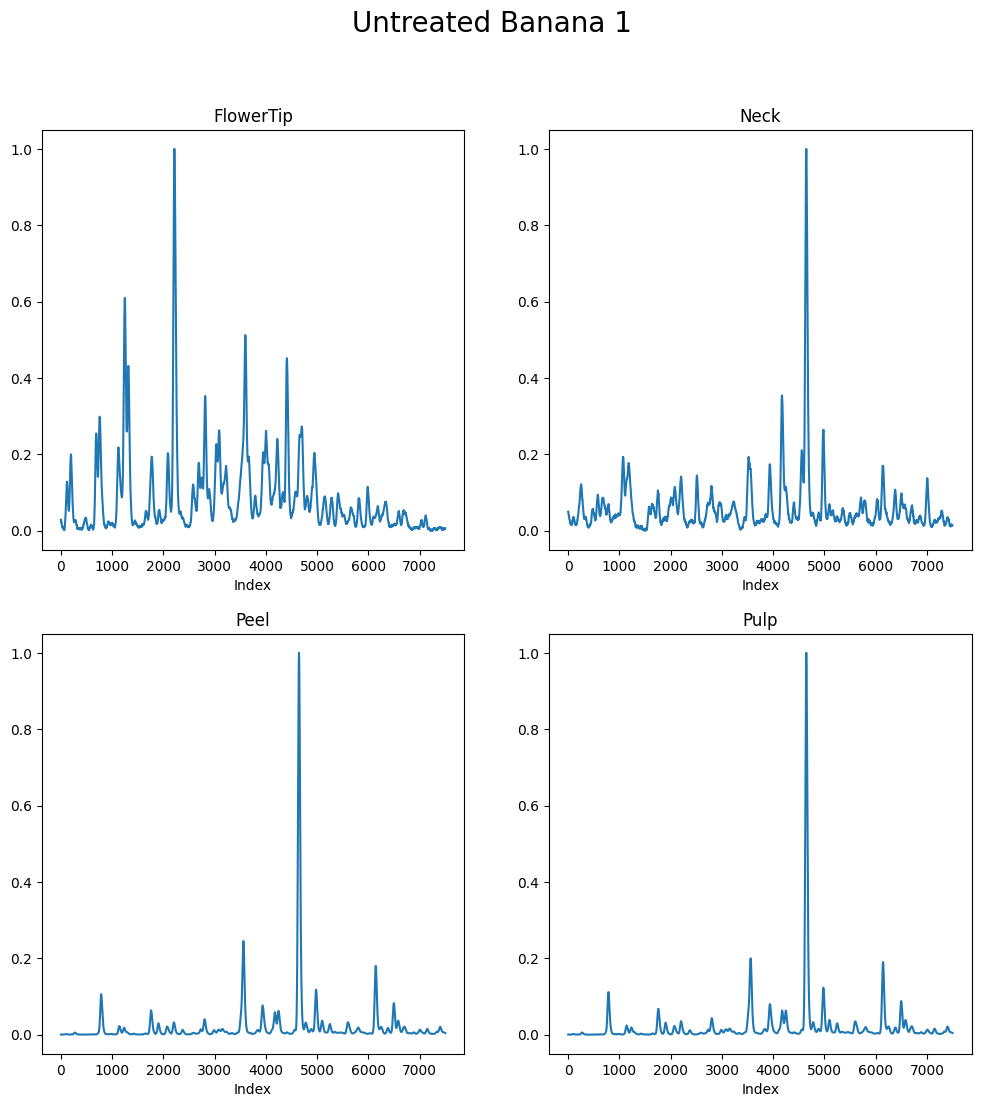

In [227]:
banana1_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/1-FlowerTip.txt"))
banana1_neck_untreated = normalize_data(load_data("../data/Untreated_samples/1-Neck.txt"))
banana1_peel_untreated = normalize_data(load_data("../data/Untreated_samples/1-Peel.txt"))
banana1_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/1-Pulp.txt"))

plot_4_signals(banana1_flowertip_untreated, banana1_neck_untreated, banana1_peel_untreated, banana1_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 1')

#### Banana 2

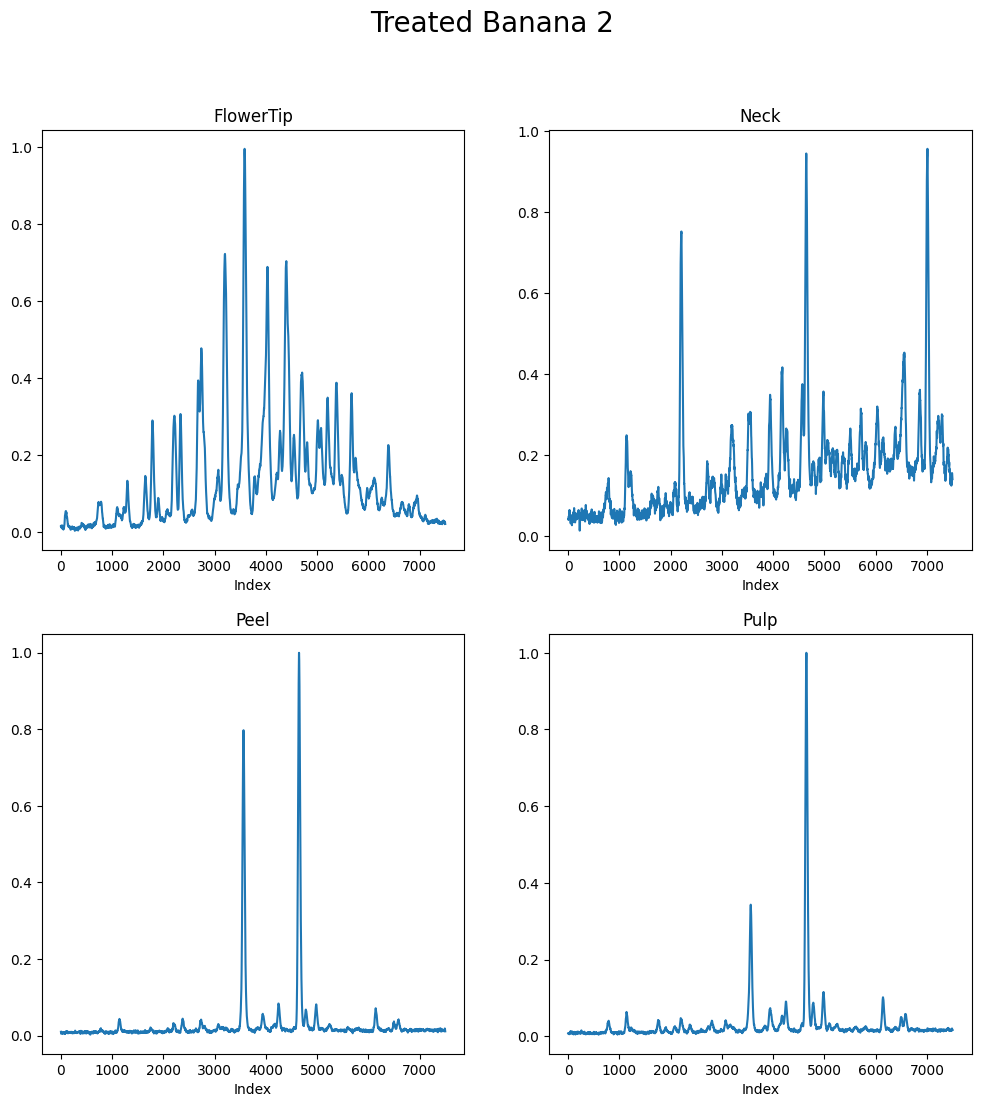

In [228]:
banana2_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-FlowerTip-3.txt")))

banana2_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-Neck-3.txt")))

banana2_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-Peel-3.txt")))

banana2_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/2-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/2-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/2-Pulp-3.txt")))

plot_4_signals(banana2_flowertip_treated, banana2_neck_treated, banana2_peel_treated, banana2_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 2')

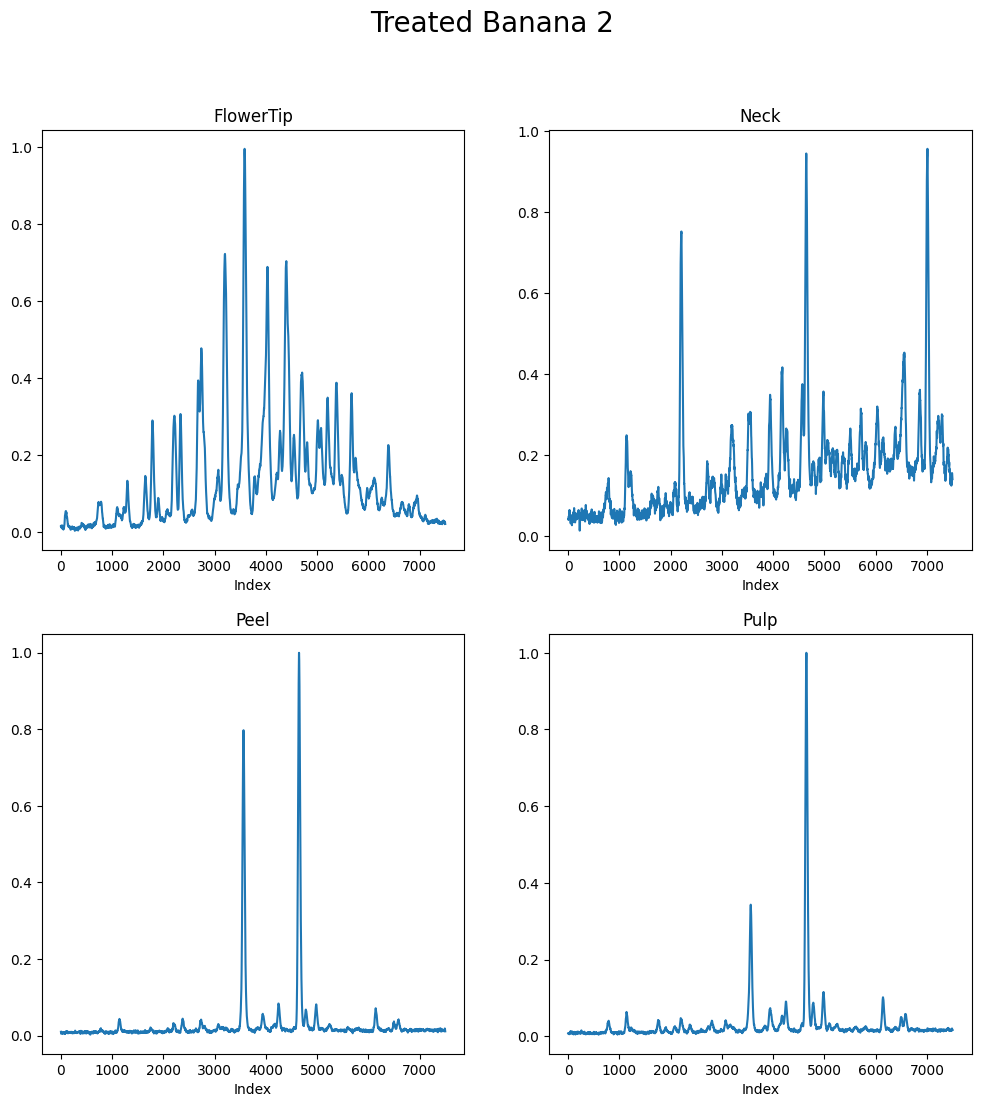

In [229]:
banana2_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/2-FlowerTip.txt"))
banana2_neck_untreated = normalize_data(load_data("../data/Untreated_samples/2-Neck.txt"))
banana2_peel_untreated = normalize_data(load_data("../data/Untreated_samples/2-Peel.txt"))
banana2_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/2-Pulp.txt"))

plot_4_signals(banana2_flowertip_treated, banana2_neck_treated, banana2_peel_treated, banana2_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 2')

#### Banana 3

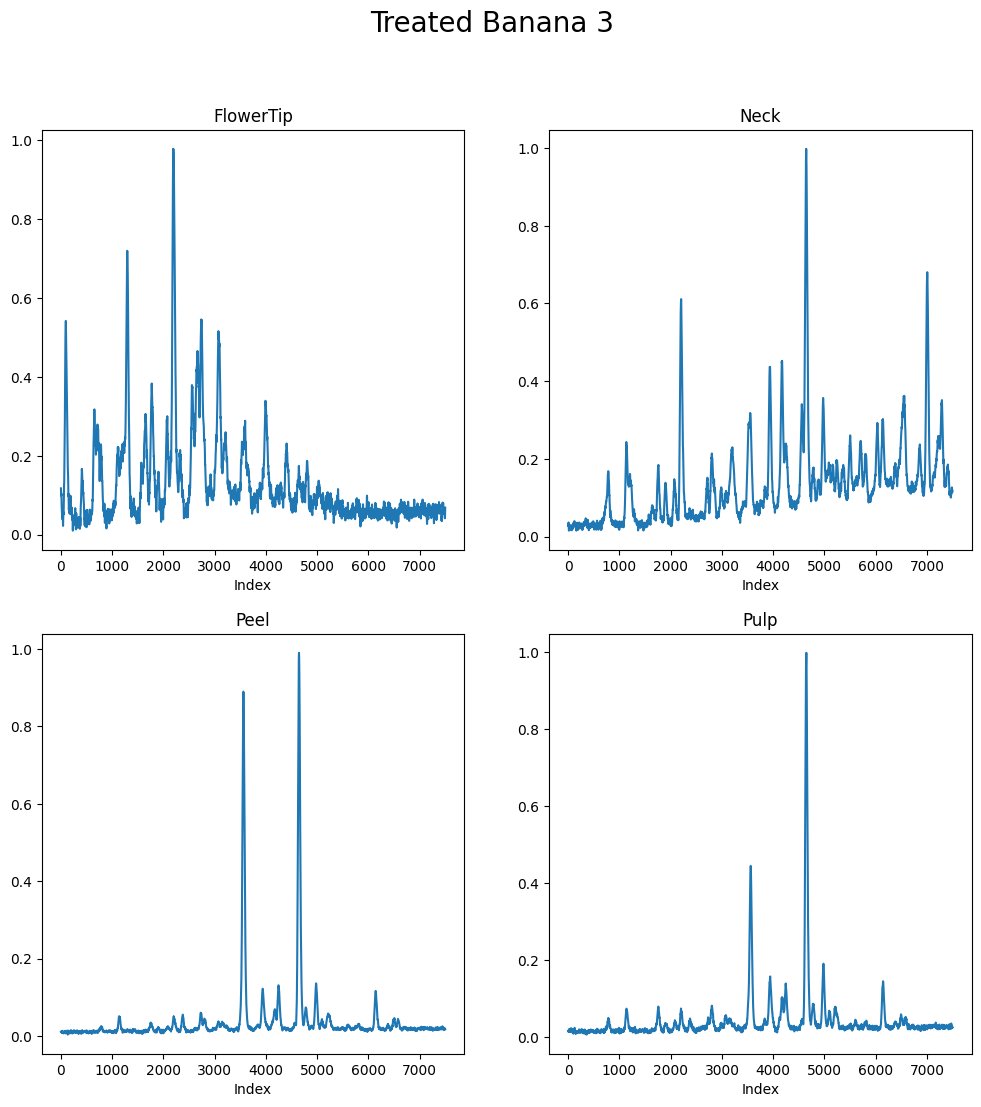

In [230]:
banana3_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-FlowerTip-3.txt")))

banana3_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-Neck-3.txt")))

banana3_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-Peel-3.txt")))

banana3_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/3-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/3-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/3-Pulp-3.txt")))

plot_4_signals(banana3_flowertip_treated, banana3_neck_treated, banana3_peel_treated, banana3_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 3')

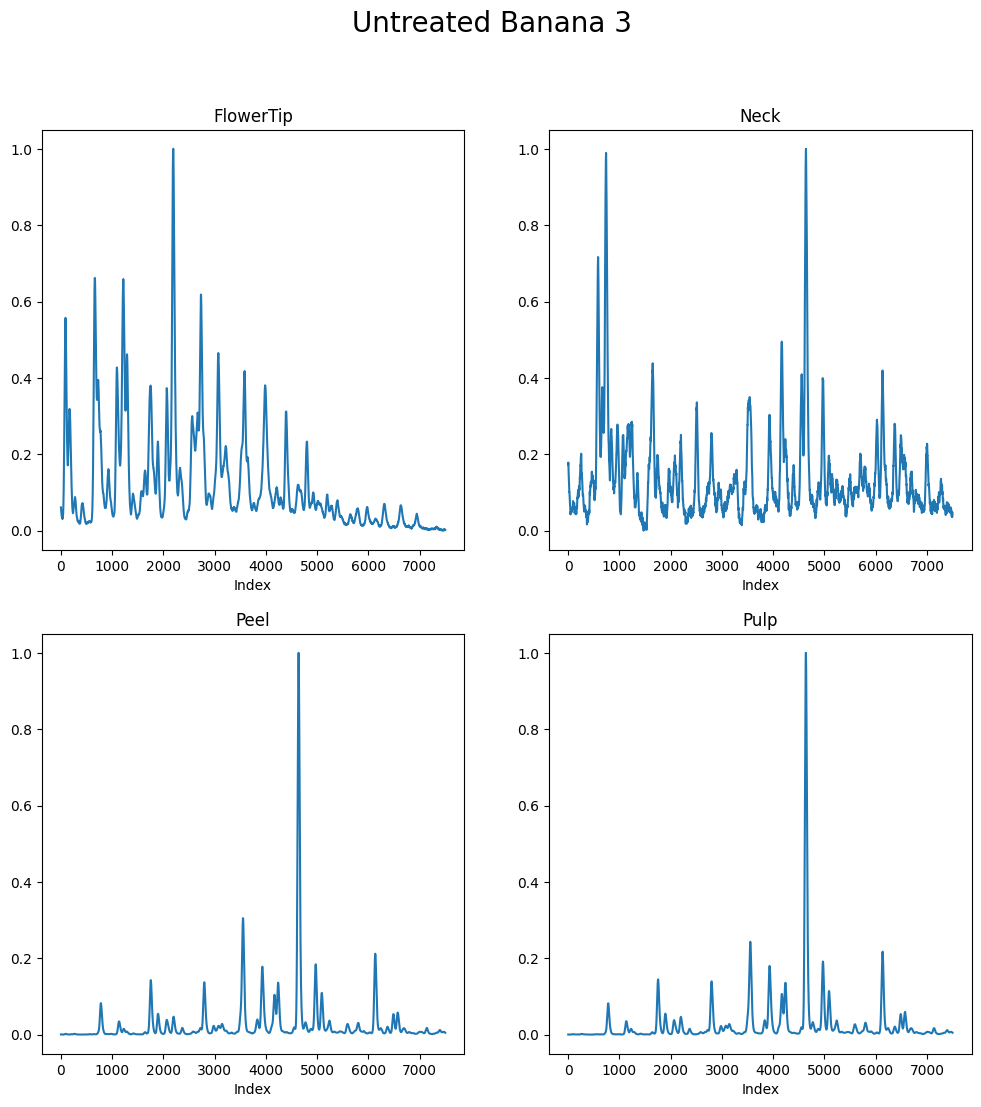

In [231]:
banana3_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/3-FlowerTip.txt"))
banana3_neck_untreated = normalize_data(load_data("../data/Untreated_samples/3-Neck.txt"))
banana3_peel_untreated = normalize_data(load_data("../data/Untreated_samples/3-Peel.txt"))
banana3_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/3-Pulp.txt"))

plot_4_signals(banana3_flowertip_untreated, banana3_neck_untreated, banana3_peel_untreated, banana3_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 3')

#### Banana 4

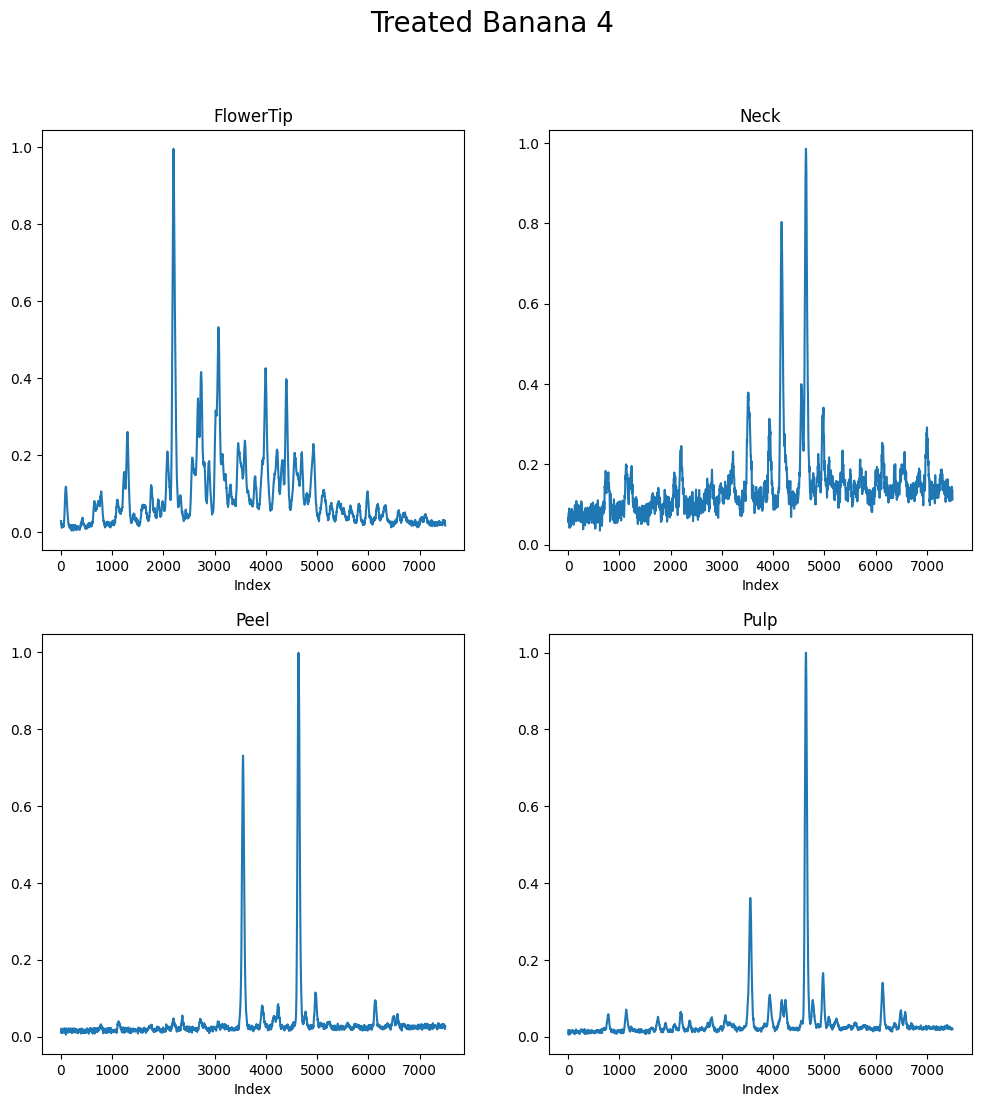

In [232]:
banana4_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-FlowerTip-3.txt")))

banana4_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-Neck-3.txt")))

banana4_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-Peel-3.txt")))

banana4_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/4-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/4-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/4-Pulp-3.txt")))

plot_4_signals(banana4_flowertip_treated, banana4_neck_treated, banana4_peel_treated, banana4_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 4')

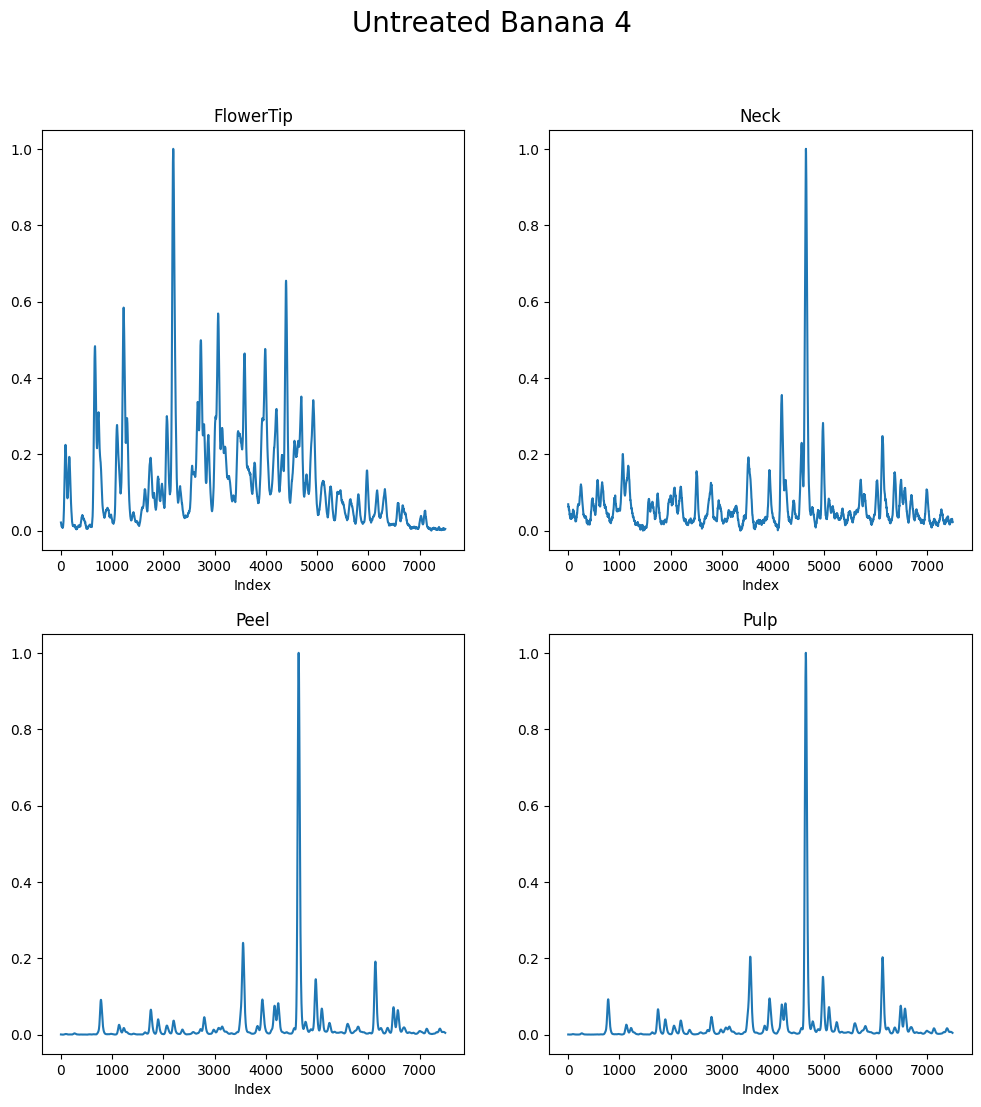

In [233]:
banana4_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/4-FlowerTip.txt"))
banana4_neck_untreated = normalize_data(load_data("../data/Untreated_samples/4-Neck.txt"))
banana4_peel_untreated = normalize_data(load_data("../data/Untreated_samples/4-Peel.txt"))
banana4_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/4-Pulp.txt"))

plot_4_signals(banana4_flowertip_untreated, banana4_neck_untreated, banana4_peel_untreated, banana4_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 4')

#### Banana 5

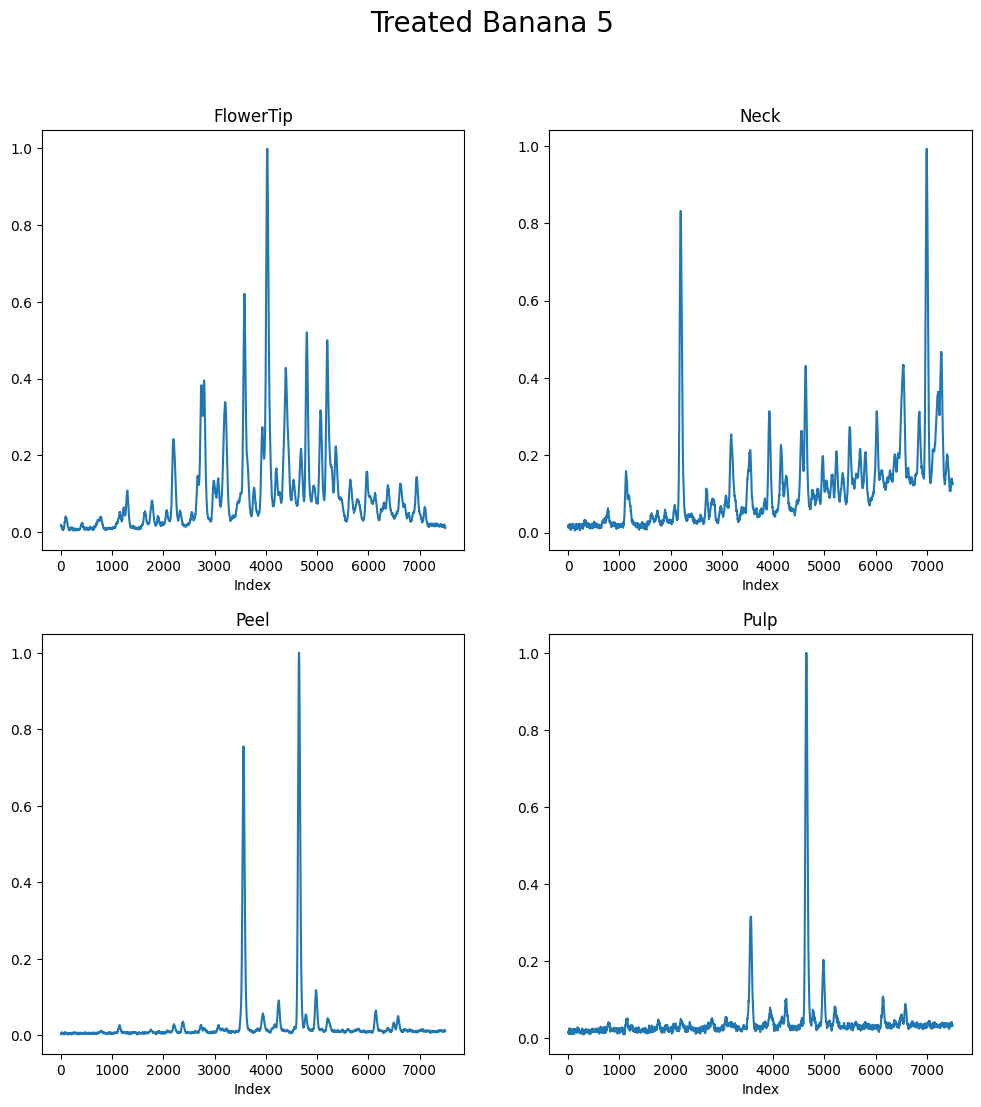

In [234]:
banana5_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-FlowerTip-3.txt")))

banana5_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-Neck-3.txt")))

banana5_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-Peel-3.txt")))

banana5_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/5-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/5-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/5-Pulp-3.txt")))

plot_4_signals(banana5_flowertip_treated, banana5_neck_treated, banana5_peel_treated, banana5_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 5')

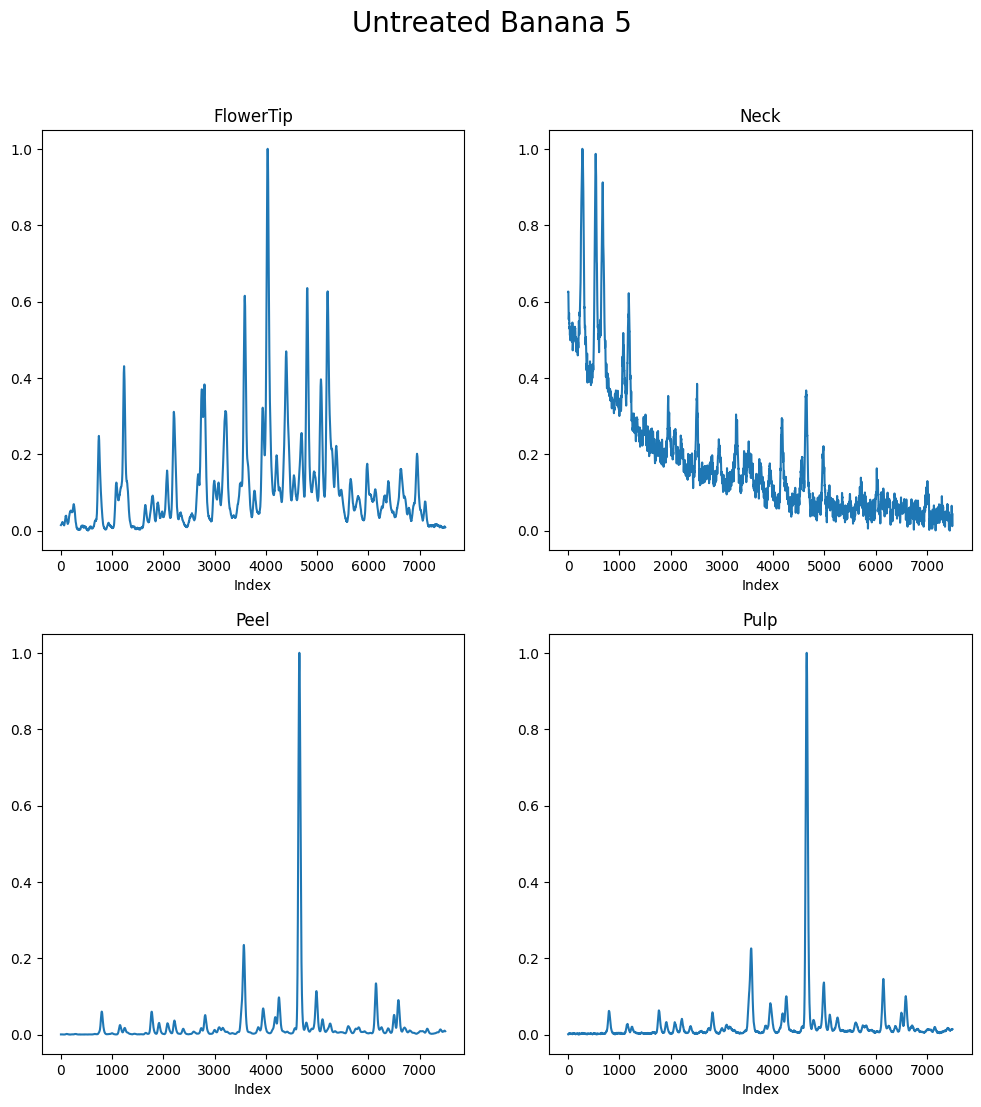

In [235]:
banana5_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/5-FlowerTip.txt"))
banana5_neck_untreated = normalize_data(load_data("../data/Untreated_samples/5-Neck.txt"))
banana5_peel_untreated = normalize_data(load_data("../data/Untreated_samples/5-Peel.txt"))
banana5_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/5-Pulp.txt"))

plot_4_signals(banana5_flowertip_untreated, banana5_neck_untreated, banana5_peel_untreated, banana5_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 5')

#### Banana 6

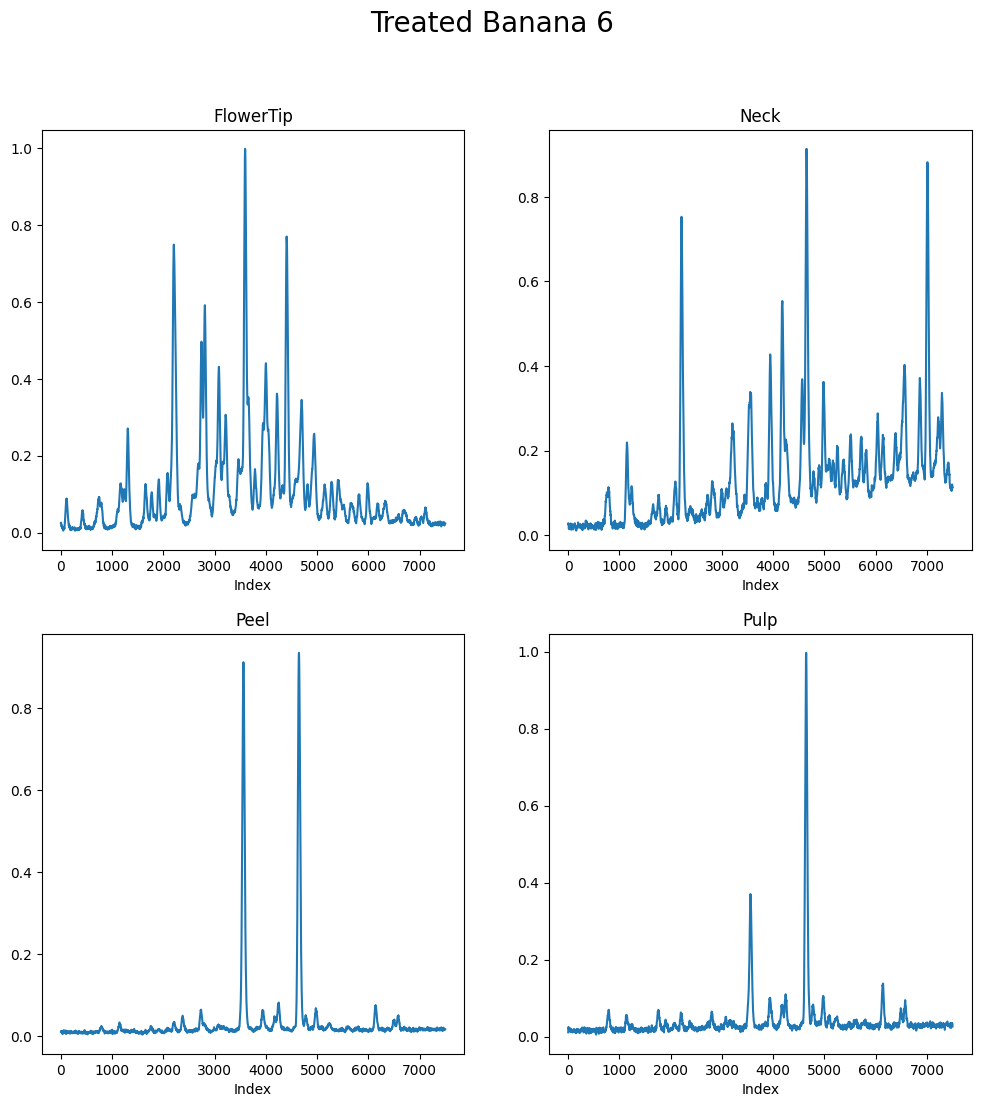

In [236]:
banana6_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-FlowerTip-3.txt")))

banana6_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-Neck-3.txt")))

banana6_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-Peel-3.txt")))

banana6_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/6-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/6-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/6-Pulp-3.txt")))

plot_4_signals(banana6_flowertip_treated, banana6_neck_treated, banana6_peel_treated, banana6_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 6')

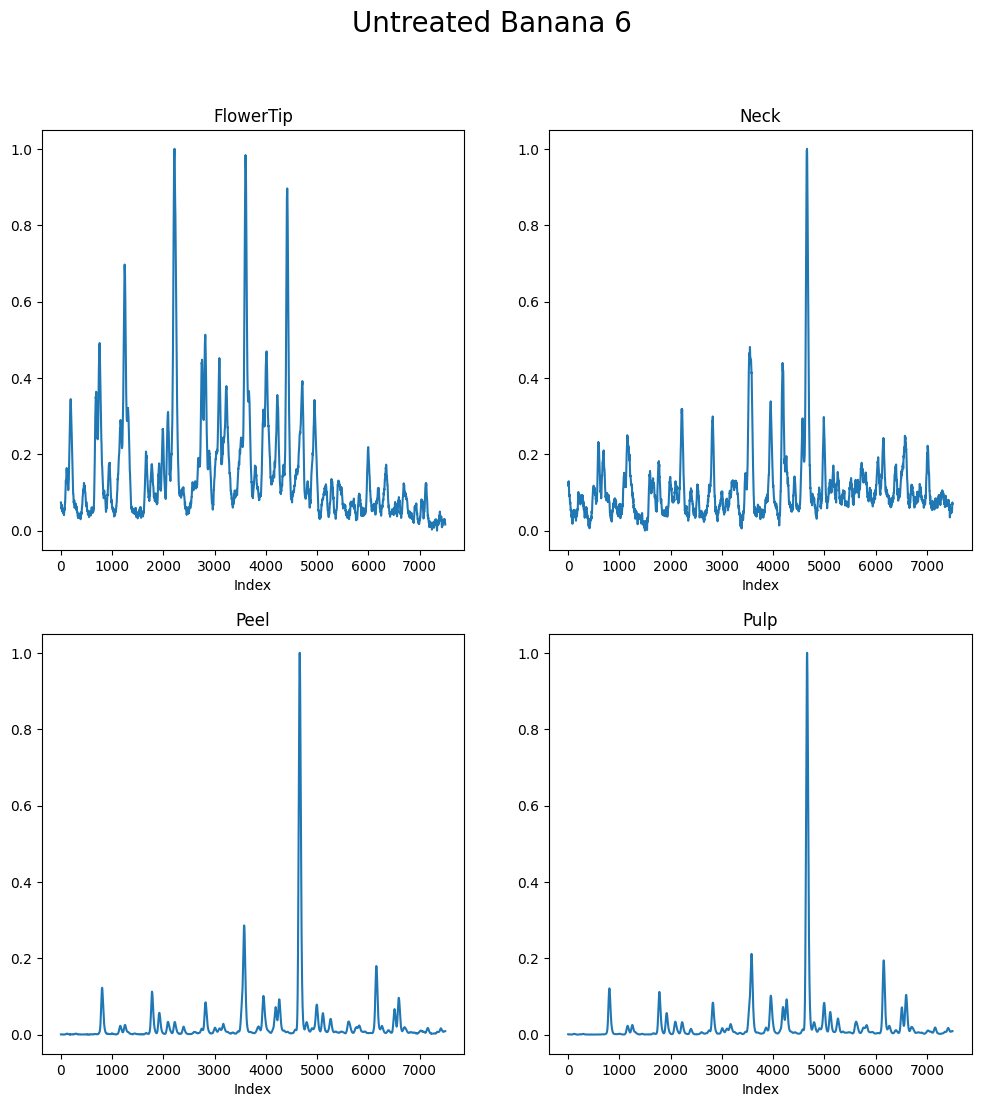

In [237]:
banana6_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/6-FlowerTip.txt"))
banana6_neck_untreated = normalize_data(load_data("../data/Untreated_samples/6-Neck.txt"))
banana6_peel_untreated = normalize_data(load_data("../data/Untreated_samples/6-Peel.txt"))
banana6_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/6-Pulp.txt"))

plot_4_signals(banana6_flowertip_untreated, banana6_neck_untreated, banana6_peel_untreated, banana6_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 6')

#### Banana 7

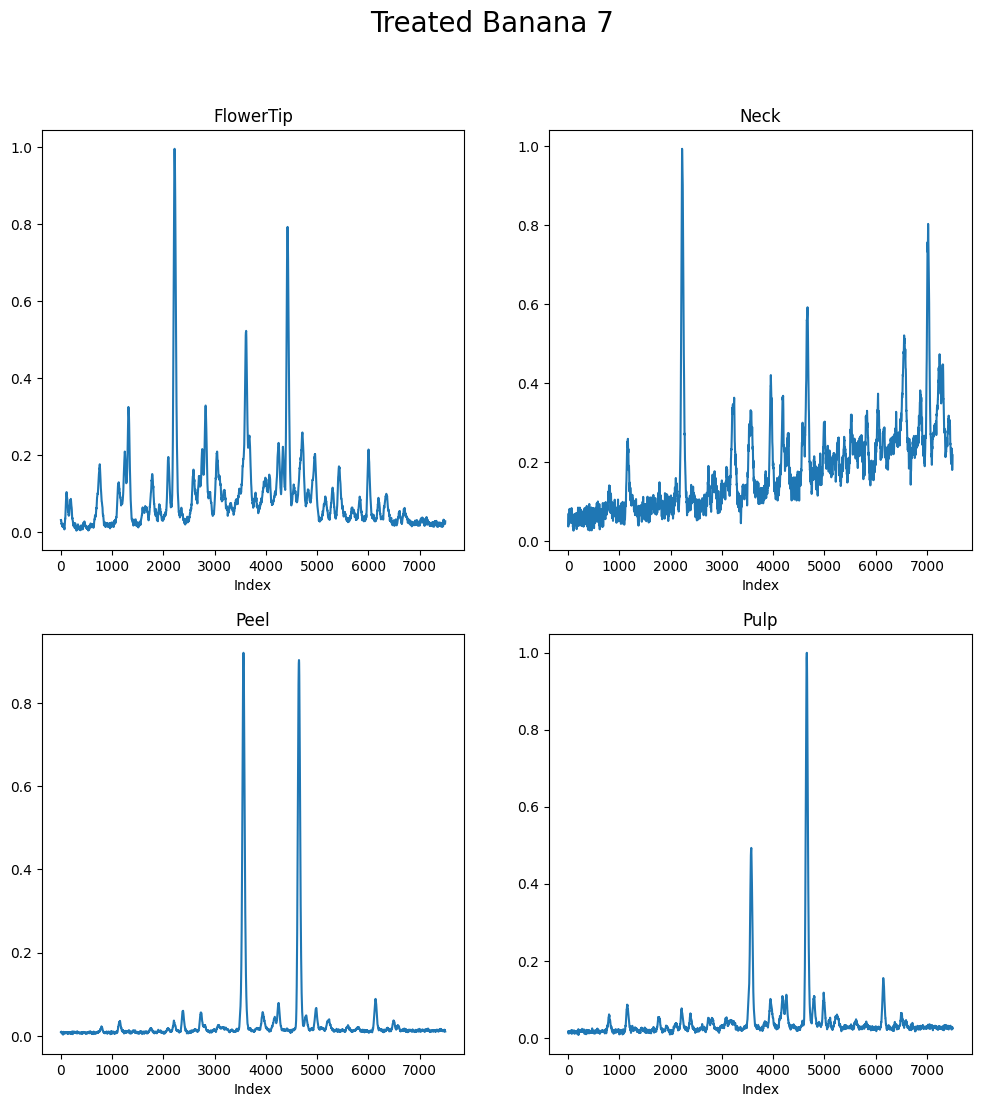

In [238]:
banana7_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-FlowerTip-3.txt")))

banana7_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-Neck-3.txt")))

banana7_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-Peel-3.txt")))

banana7_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/7-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/7-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/7-Pulp-3.txt")))

plot_4_signals(banana7_flowertip_treated, banana7_neck_treated, banana7_peel_treated, banana7_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 7')

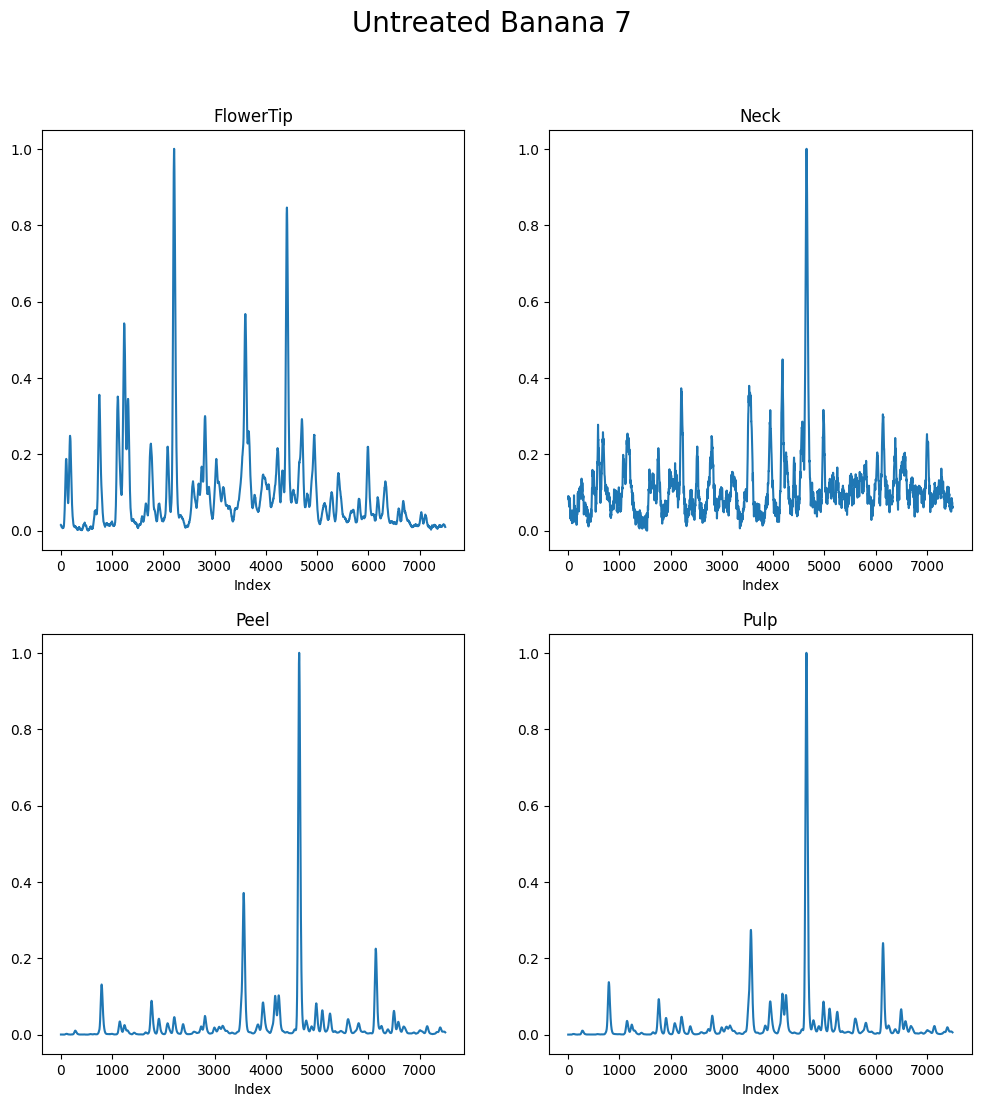

In [239]:
banana7_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/7-FlowerTip.txt"))
banana7_neck_untreated = normalize_data(load_data("../data/Untreated_samples/7-Neck.txt"))
banana7_peel_untreated = normalize_data(load_data("../data/Untreated_samples/7-Peel.txt"))
banana7_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/7-Pulp.txt"))

plot_4_signals(banana7_flowertip_untreated, banana7_neck_untreated, banana7_peel_untreated, banana7_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 7')

#### Banana 8

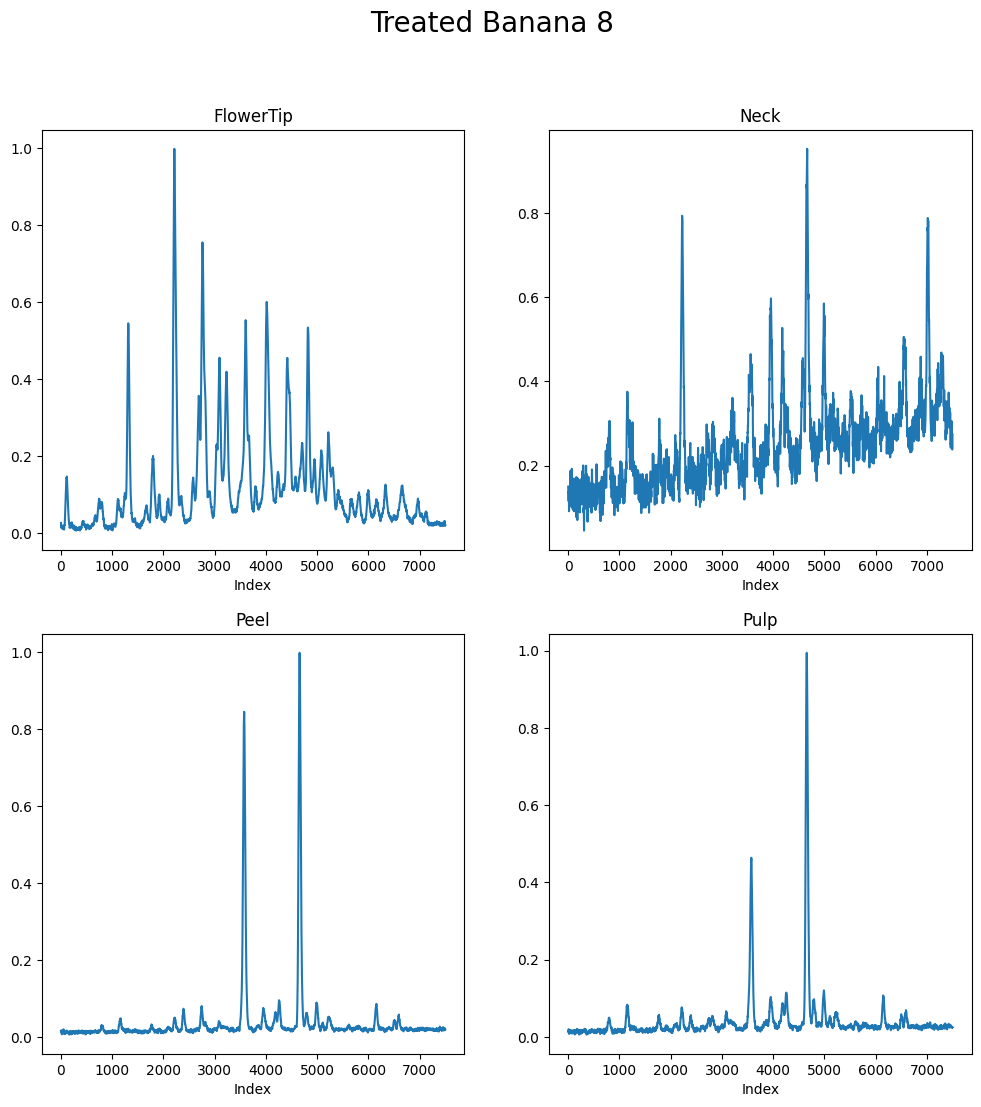

In [240]:
banana8_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-FlowerTip-3.txt")))

banana8_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-Neck-3.txt")))

banana8_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-Peel-3.txt")))

banana8_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/8-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/8-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/8-Pulp-3.txt")))

plot_4_signals(banana8_flowertip_treated, banana8_neck_treated, banana8_peel_treated, banana8_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 8')

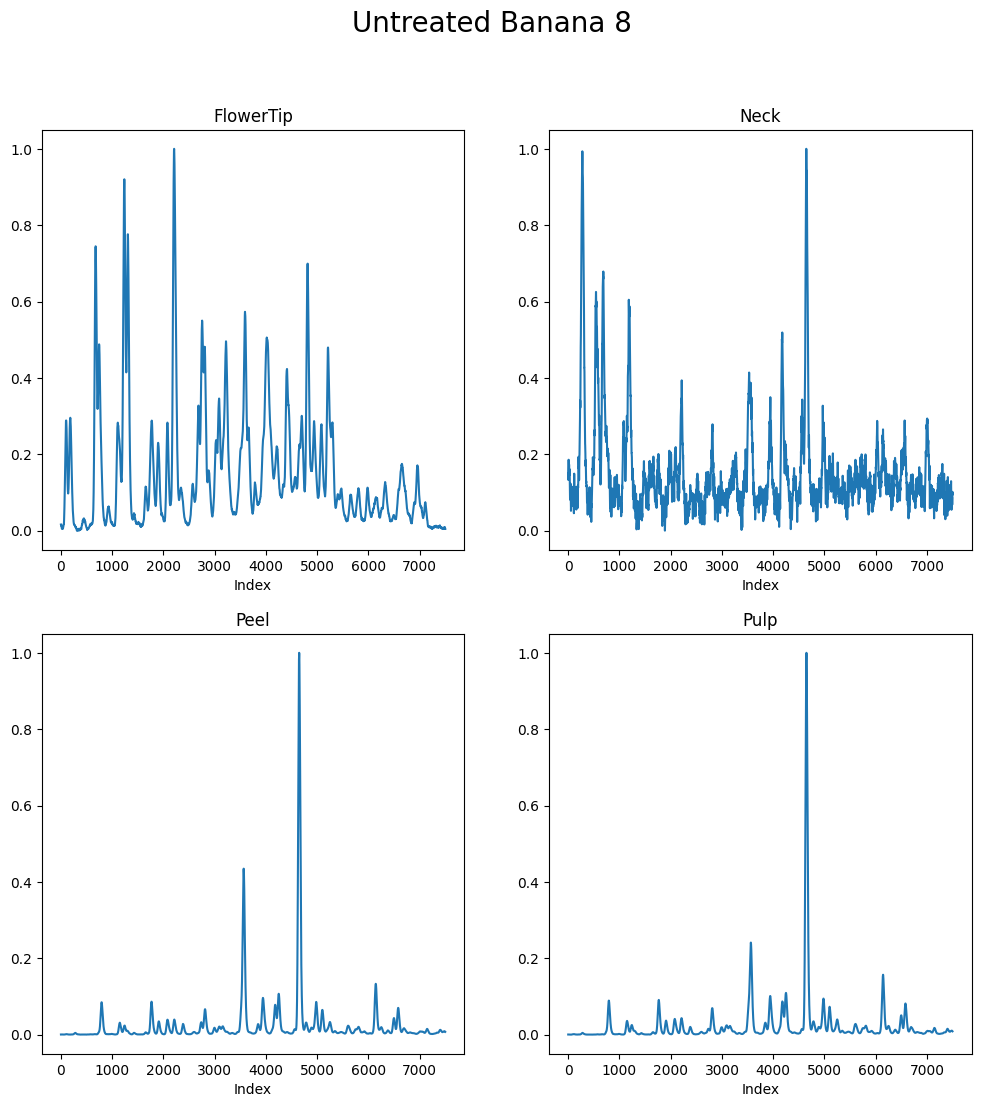

In [241]:
banana8_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/8-FlowerTip.txt"))
banana8_neck_untreated = normalize_data(load_data("../data/Untreated_samples/8-Neck.txt"))
banana8_peel_untreated = normalize_data(load_data("../data/Untreated_samples/8-Peel.txt"))
banana8_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/8-Pulp.txt"))

plot_4_signals(banana8_flowertip_untreated, banana8_neck_untreated, banana8_peel_untreated, banana8_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 8')

#### Banana 9

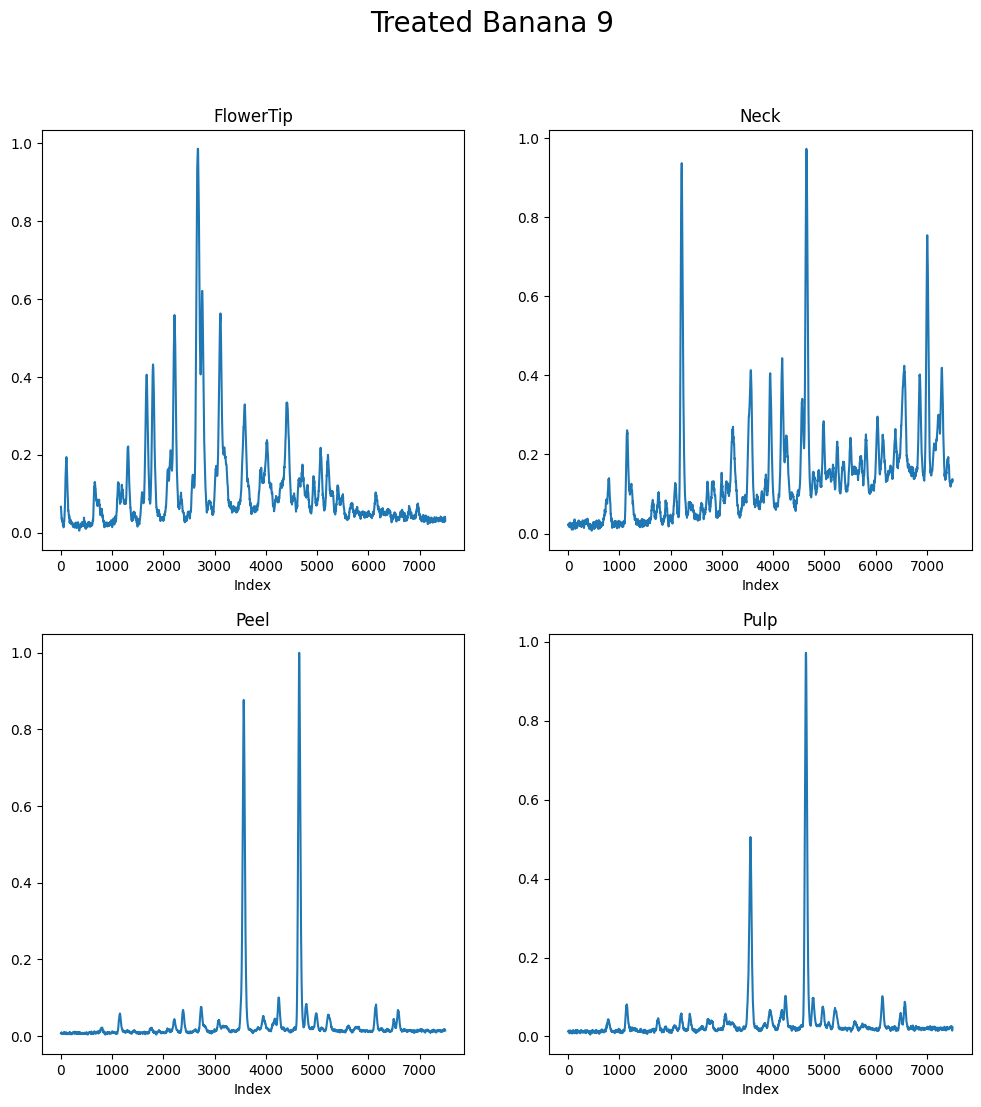

In [242]:
banana9_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-FlowerTip-3.txt")))

banana9_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-Neck-3.txt")))

banana9_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-Peel-3.txt")))

banana9_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/9-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/9-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/9-Pulp-3.txt")))

plot_4_signals(banana9_flowertip_treated, banana9_neck_treated, banana9_peel_treated, banana9_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 9')

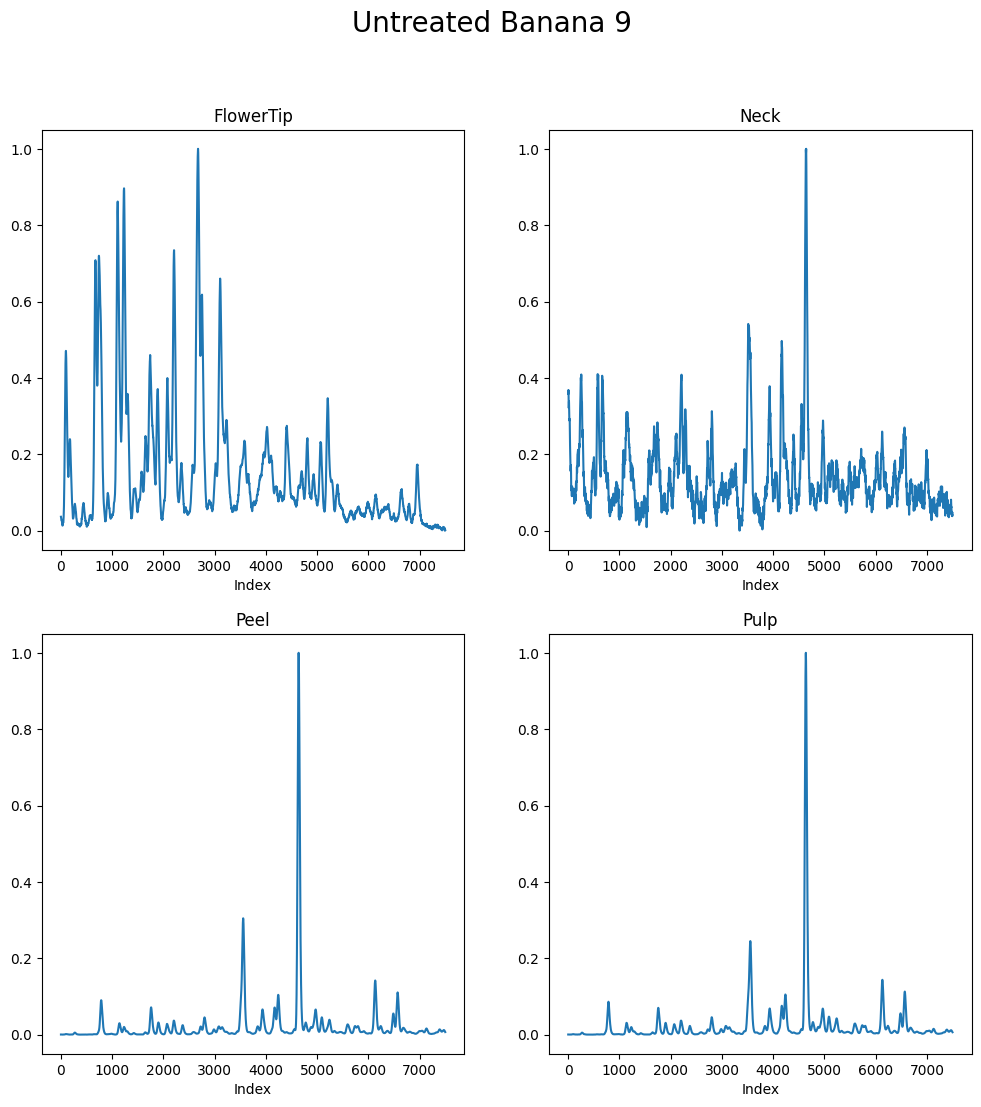

In [243]:
banana9_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/9-FlowerTip.txt"))
banana9_neck_untreated = normalize_data(load_data("../data/Untreated_samples/9-Neck.txt"))
banana9_peel_untreated = normalize_data(load_data("../data/Untreated_samples/9-Peel.txt"))
banana9_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/9-Pulp.txt"))

plot_4_signals(banana9_flowertip_untreated, banana9_neck_untreated, banana9_peel_untreated, banana9_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 9')

#### Banana 10

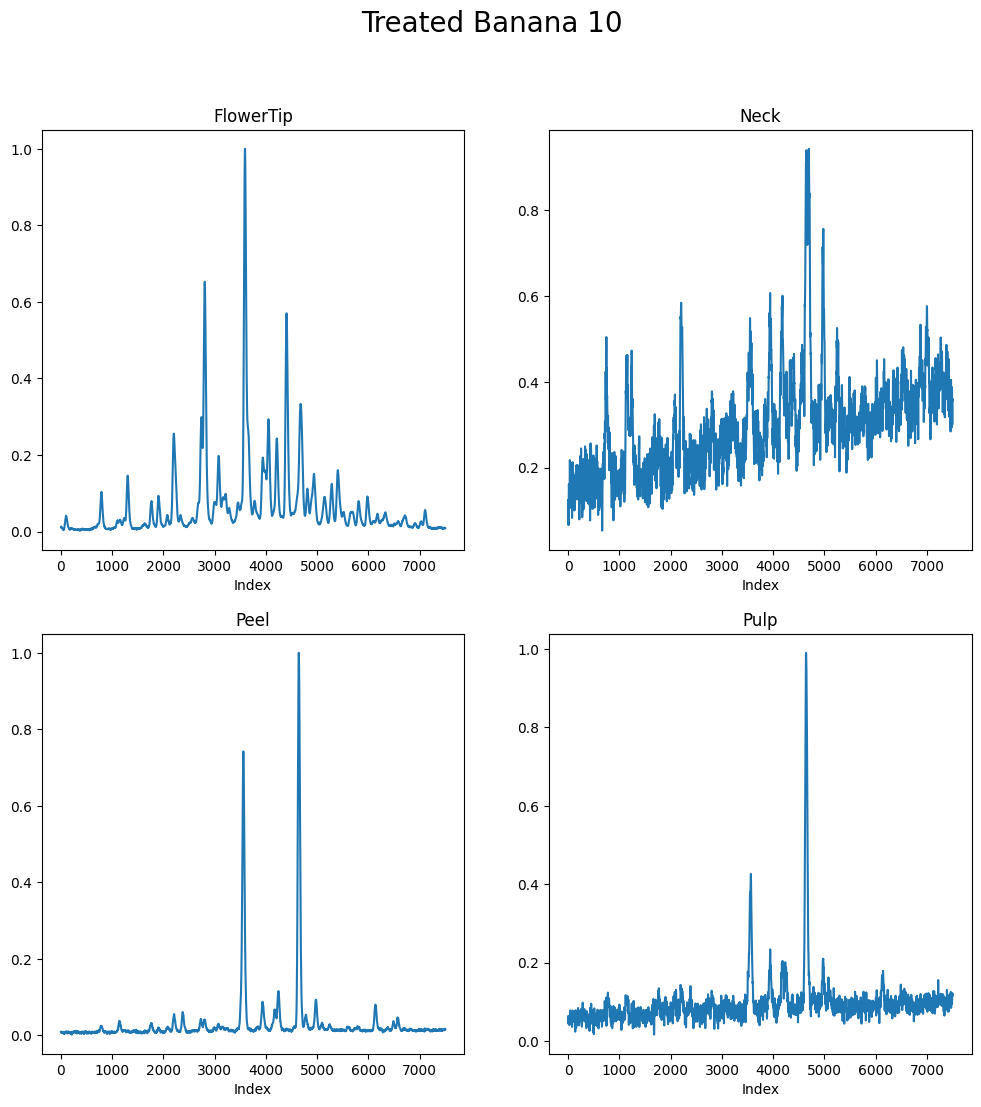

In [244]:
banana10_flowertip_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-FlowerTip-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-FlowerTip-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-FlowerTip-3.txt")))

banana10_neck_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-Neck-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-Neck-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-Neck-3.txt")))

banana10_peel_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-Peel-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-Peel-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-Peel-3.txt")))

banana10_pulp_treated = average_signals(
    normalize_data(load_data("../data/Treated_samples/10-Pulp-1.txt")), 
    normalize_data(load_data("../data/Treated_samples/10-Pulp-2.txt")),
    normalize_data(load_data("../data/Treated_samples/10-Pulp-3.txt")))

plot_4_signals(banana10_flowertip_treated, banana10_neck_treated, banana10_peel_treated, banana10_pulp_treated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Treated Banana 10')

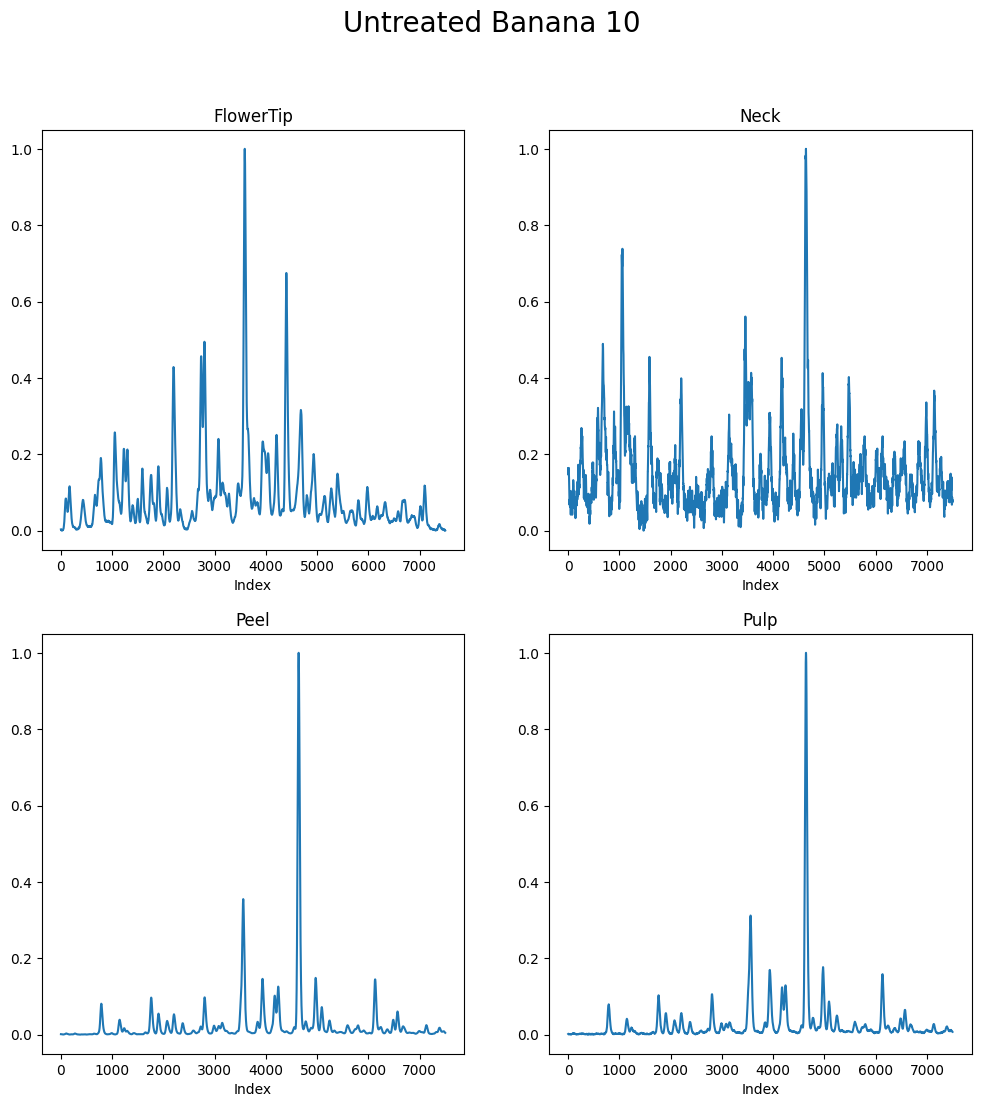

In [245]:
banana10_flowertip_untreated = normalize_data(load_data("../data/Untreated_samples/10-FlowerTip.txt"))
banana10_neck_untreated = normalize_data(load_data("../data/Untreated_samples/10-Neck.txt"))
banana10_peel_untreated = normalize_data(load_data("../data/Untreated_samples/10-Peel.txt"))
banana10_pulp_untreated = normalize_data(load_data("../data/Untreated_samples/10-Pulp.txt"))

plot_4_signals(banana10_flowertip_untreated, banana10_neck_untreated, banana10_peel_untreated, banana10_pulp_untreated, 'FlowerTip', 'Neck', 'Peel', 'Pulp', 'Untreated Banana 10')

## Clusters identification

Our main goal will be to create two clusters of bananas that could be identified as Plátanode Canarias, and one another. We will use the KMeans algorithm to do so. We will apply it on the treated and untreated samples for each sampling catagory before making a conclusion.

### Flower tip

## Conclusion